In [1]:
bulk=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.bulk_2021-03-23.lowMOI.csv',
              sep=',',header=TRUE,row.names=1)
head(bulk)

,SAMD11,HES4,ISG15,ERRFI1,ENO1,EFHD2,EPHA2,UBR4,CAMK2N1,CDA,⋯,GTSE1,CTA.29F11.1,CCT8,EVA1C,CBR3,TFF1,PDXK,MT.ND1,MT.ATP6,MT.ND6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WT,0.15193656,0.02298284,5.354612e-05,-0.01767839,0.03628081,-0.033430628,-0.10764159,-0.03870101,0.107626088,-0.015288017,⋯,0.05991055,-0.05121877,0.001772852,-0.17247756,0.061548363,-0.09000221,0.28093308,0.17777318,-0.022338379,0.027950011
P34R,-0.11348481,0.01857179,-2.957149e-02,0.02203649,-0.01475593,0.097747430,0.03531216,0.04502264,0.031144112,-0.015290106,⋯,0.04539826,-0.02291710,0.046986882,-0.03132249,0.004339813,-0.02095854,-0.00758502,-0.04656975,0.143290386,0.005185587
A59E,-0.19458011,-0.10993996,-5.963203e-03,0.05395488,-0.01358737,-0.041117933,0.07238775,0.02402490,0.009853090,-0.089937419,⋯,-0.07323426,0.02842703,0.028512631,0.05779123,-0.065756172,0.15299779,-0.18611911,-0.09257947,0.122949533,0.023615345
T158A,0.10991044,0.03651933,-2.579740e-02,-0.01080683,0.07339333,-0.014749840,-0.03732039,0.01213081,0.026221169,0.021960851,⋯,0.04633435,-0.02876110,0.033104740,-0.08909956,0.047239117,-0.10888530,0.21539417,0.11497585,-0.004342719,-0.023748059
R164Q,0.14984697,0.03621665,-1.731273e-02,-0.02946635,0.01626255,-0.059109606,-0.14914174,-0.02172126,0.075926781,-0.008775024,⋯,0.06960475,-0.01994906,-0.059479479,-0.10555045,0.083300449,-0.09647142,0.27838054,0.17083673,-0.007302497,-0.013987234
D33E,-0.07475653,-0.11688060,-3.791485e-02,0.07093120,-0.02514615,0.007323609,-0.05926181,-0.09499830,-0.009750878,-0.055009041,⋯,0.02772585,-0.04588839,-0.061521806,0.07165831,-0.081727706,-0.06614209,-0.07394560,0.06248423,-0.090425432,0.020748854


In [2]:
length(rownames(bulk))

[1] 99

In [3]:
rownames(bulk)

[1] "WT"         "P34R"       "A59E"       "T158A"      "R164Q"     
 [6] "D33E"       "G12C"       "K179R"      "G77A"       "T20T"      
[11] "AG11TD"     "G12A"       "K117R"      "E63K"       "K147T"     
[16] "D57N"       "T158T"      "C118S"      "Q22K"       "G12F"      
[21] "G12V"       "G13R"       "G13E"       "Q61K"       "G12S"      
[26] "A146P"      "A59T"       "G13C"       "R135T"      "Q61H"      
[31] "P110S"      "T74T"       "G13V"       "M111L"      "G12Y"      
[36] "K176Q"      "T127T"      "G60S"       "S136N"      "D30D"      
[41] "Y166H"      "A66A"       "A146V"      "S17S"       "G12R"      
[46] "G60V"       "T50T"       "G60D"       "T74A"       "P34L"      
[51] "Q22H"       "G12I"       "K178K"      "F141L"      "K169K"     
[56] "Q61R"       "K88K"       "T20R"       "I36M"       "Q61P"      
[61] "K147N"      "C185Y"      "T50P"       "N26Y"       "Q61A"      
[66] "L159S"      "E31K"       "Q99E"       "M170L"      "G12D"      
[71] "L79I"       "T144P"      "G75A"       "D173D"      "R68S"      
[76] "Q25H"       "R41K"       "Q61L"       "T50I"       "T144T"     
[81] "unassigned" "D119G"      "AG59GV"     "L19F"       "T20M"      
[86] "L52F"       "K5E"        "A59G"       "V112I"      "A146T"     
[91] "T58I"       "V14I"       "V14L"       "I163S"      "V8V"       
[96] "R149K"      "A130V"      "K117N"      "A155G"

In [4]:
scores_init=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.scores.lowMOI.csv',
                 sep=',',header=TRUE,row.names=1)
print(head(scores_init))
scores_init=scores_init[rownames(bulk),]
scores=data.frame(score=as.numeric(as.character(scores_init[,'HotellingT2.mean'])))
rownames(scores)=rownames(scores_init)
colnames(scores)='score'
head(scores)

      HotellingT2.mean HotellingT2.ci.0.95.low HotellingT2.ci.0.95.high
WT            32.29041                25.68410                 38.89672
P34R         967.34422               915.10330               1019.58515
A59E        3260.48233              3128.62696               3392.33769
T158A         31.67043                26.86742                 36.47345
R164Q         35.25794                27.65711                 42.85877
D33E         680.01585               646.79250                713.23919
      HotellingT2.q
WT        0.6638298
P34R      0.0000100
A59E      0.0000100
T158A     0.6638298
R164Q     0.6426578
D33E      0.0000100


,score
,<dbl>
WT,32.29041
P34R,967.34422
A59E,3260.48233
T158A,31.67043
R164Q,35.25794
D33E,680.01585


In [5]:
scores['T74T',]

[1] 43.9086

In [6]:
bulk_corr=cor(t(bulk),method='spearman')

In [7]:
x=bulk_corr
hc <- hclust(dist(x,method='manhattan'),method='complete')

In [8]:
options(repr.plot.width=20, repr.plot.height=4)

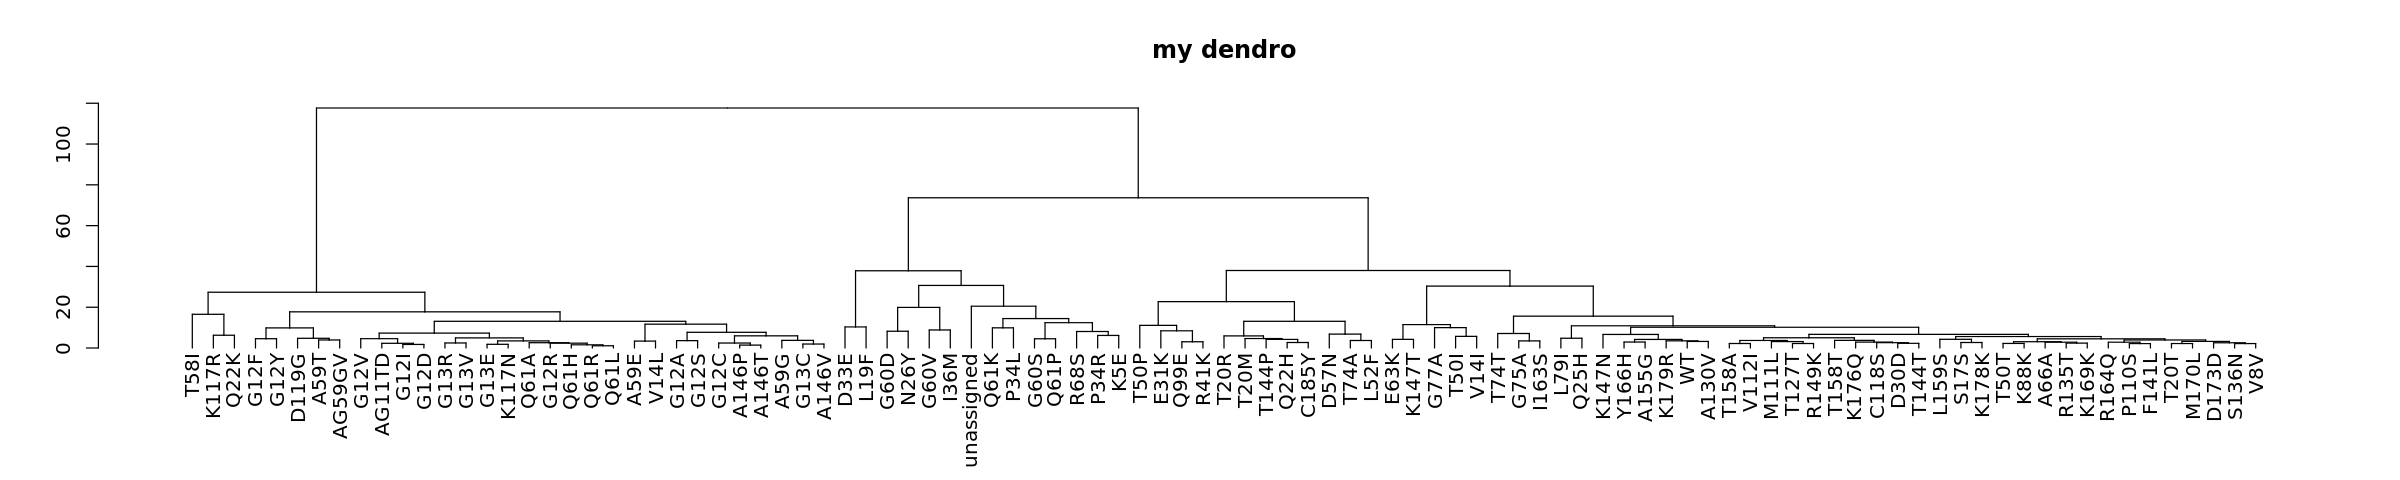

In [9]:
dd <- as.dendrogram(hc)
plot(dd, main = "my dendro")

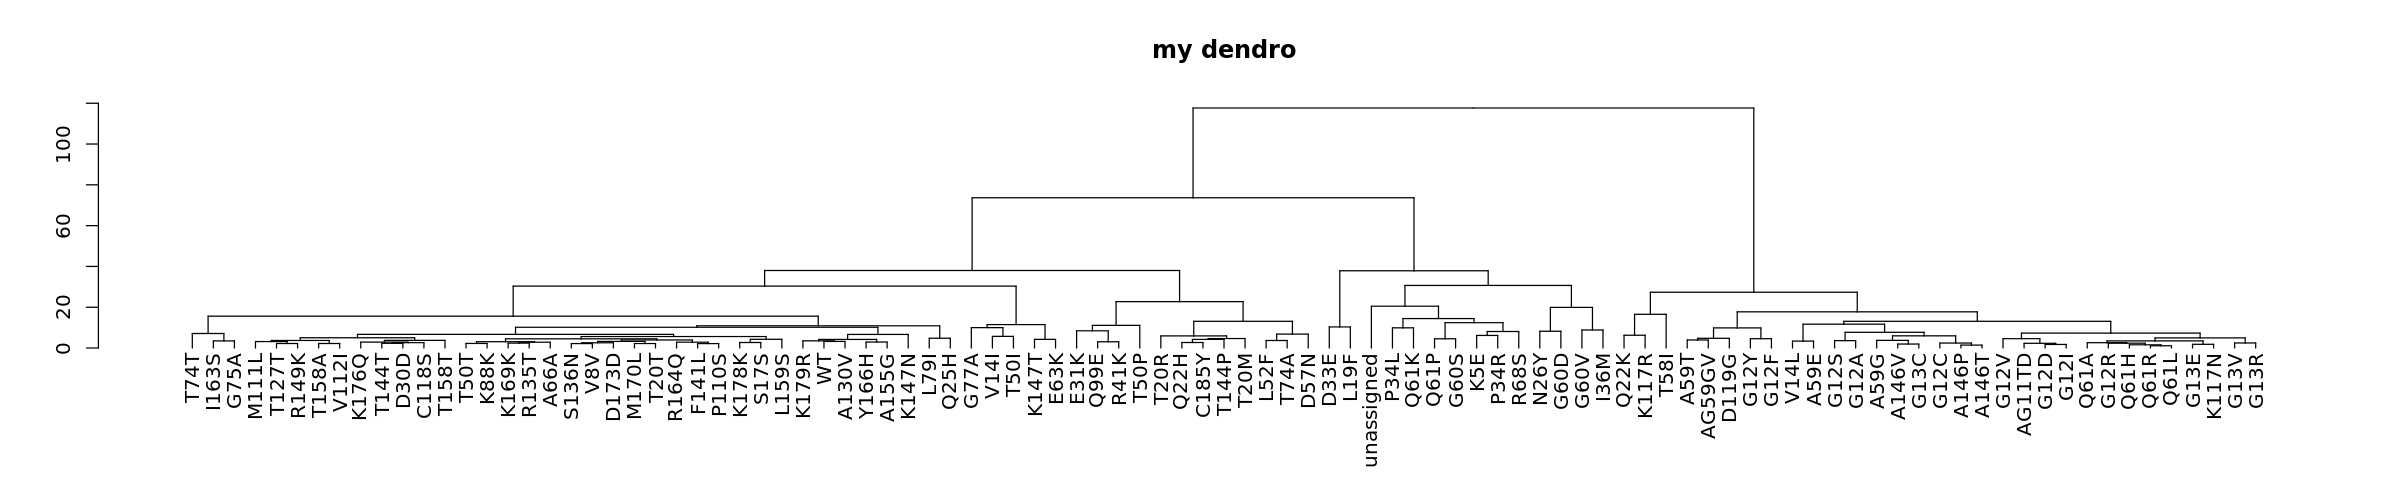

In [10]:
dd.reorder <- reorder(dd, wts=scores[rownames(x),'score'],agglo.FUN = mean)
plot(dd.reorder, main = "my dendro")

In [11]:
require(dendextend)

Loading required package: dendextend


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




In [12]:
dend <- color_branches(dd.reorder, k=3) 

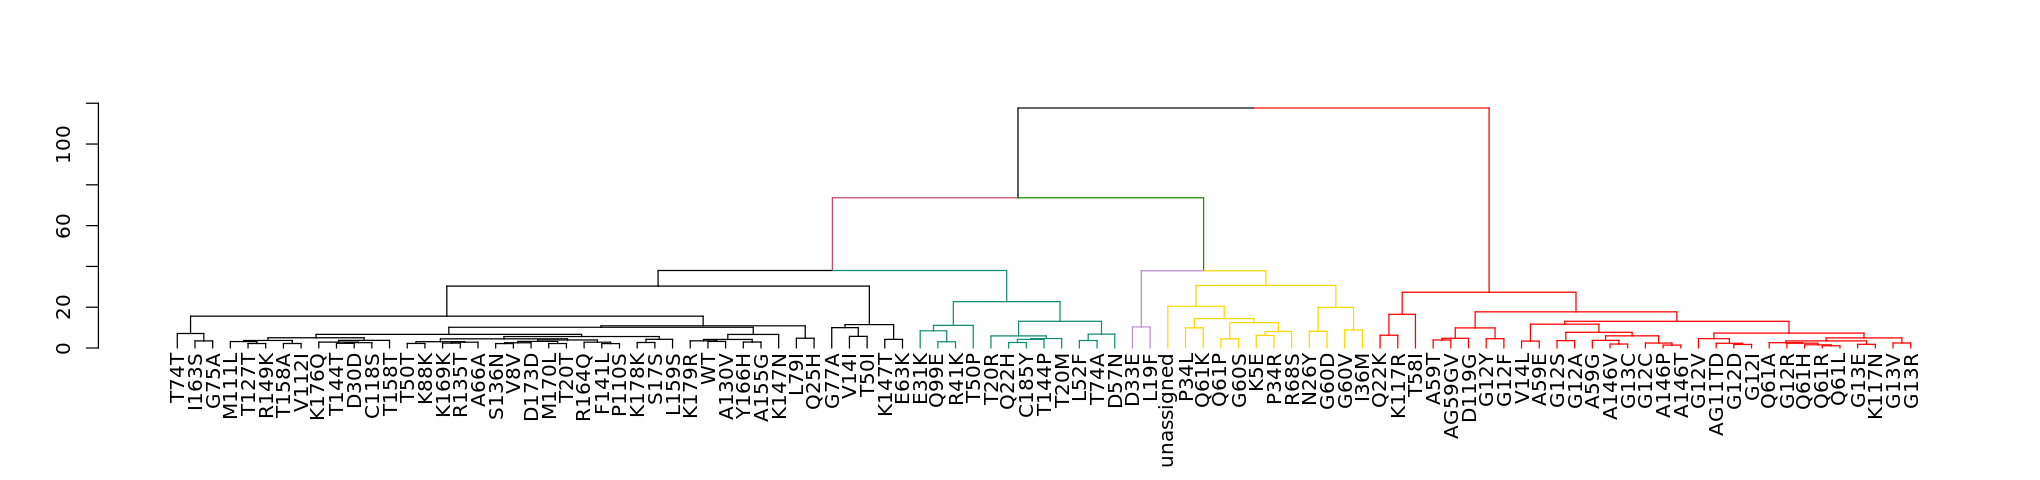

In [13]:
options(repr.plot.width=17, repr.plot.height=4)
d1 <- color_branches(dend, 5, col = c('black','#138D75','#BB8FCE','gold','red'))
plot(d1)

In [14]:
options(repr.plot.width=17, repr.plot.height=4)
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/KRAS'
pdf(paste(f_pref,'.dendrogram.lowMOI.pdf',sep=''),width=20,height=5)
d1 <- color_branches(dend, 5, col = c('black','#138D75','#BB8FCE','gold','red'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.lowMOI.pdf',sep=''))

NULL


png 
  2

[1] "/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/KRAS.dendrogram.lowMOI.pdf"


In [41]:
par('mar')
par(mar=c(1,1,1,1))

[1] 5.1 4.1 4.1 2.1

In [42]:
dev.off()
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/KRAS'
png(paste(f_pref,'.dendrogram.png',sep=''),width=20,height=5)
d1 <- color_branches(dend, 5, col = c('black','#138D75','#BB8FCE','gold','red'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.lowMOI.png',sep=''))

null device 
          1

ERROR: Error in plot.new(): figure margins too large


In [43]:
png()
dev.off()

png 
  2

In [15]:
sorted_variants=rownames(x)[order.dendrogram(dend)]
sorted_variants_df=data.frame(variant=sorted_variants,
                              color=get_leaves_branches_col(d1))

In [16]:
res='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.corrL1.sorted_variants_lowMOI.csv'
write.table(sorted_variants_df,res,sep=',',quote=FALSE,row.names=FALSE,col.names=FALSE)